In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
customers.head(), products.head(), transactions.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [3]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

# Convert 'SignupDate' and 'TransactionDate' to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Data types of columns
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [4]:
# Basic statistics (getting info of data)
print(customers.describe())
print(products.describe())
print(transactions.describe())

                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                   

In [ ]:
#Task 1

In [5]:
# Total revenue
transactions['Revenue'] = transactions['Quantity'] * transactions['Price']
total_revenue = transactions['Revenue'].sum()

# Explore transaction trends by month and year
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['Revenue'].sum()

# Check popular products
popular_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

# Sales by region
sales_by_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID').groupby('Region')['Revenue'].sum()

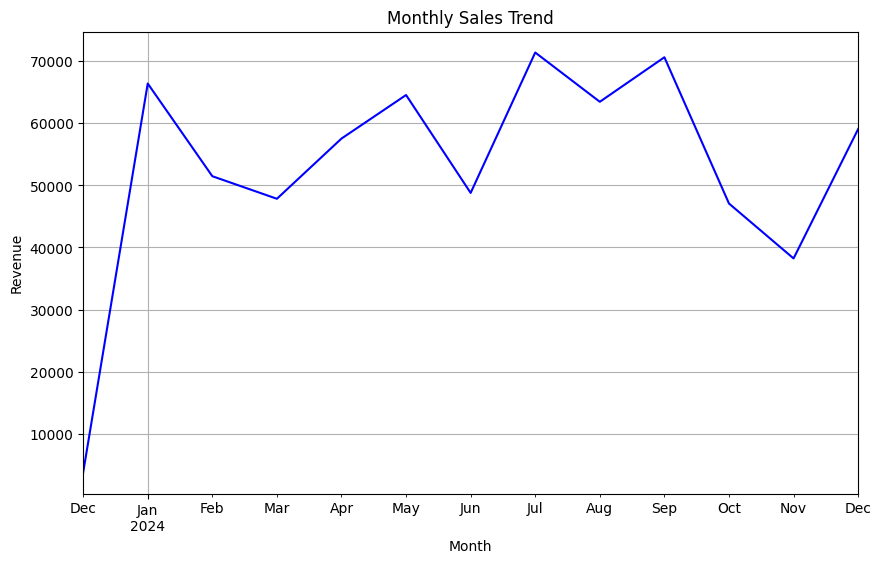

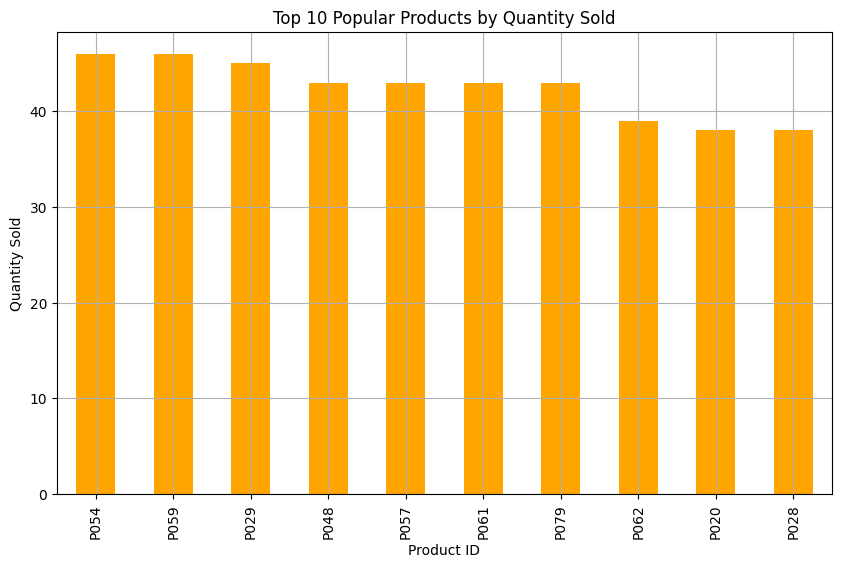

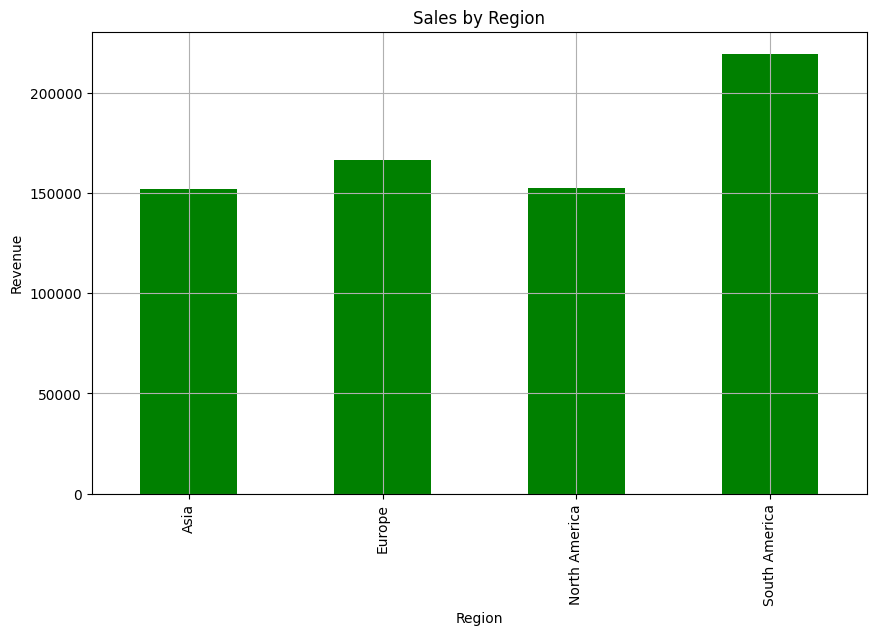

In [6]:
# Plot monthly sales trend (linegraph)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Plot popular products (barplot)
plt.figure(figsize=(10, 6))
popular_products.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Popular Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

# Sales by region (barplot)
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [7]:
# Save insights to a text file
business_insights = """
Business Insights
1. Total Revenue: The total revenue generated from all transactions is ${:.2f}.
2. Top-Selling Products: The most popular product is Product ID {} with {} units sold.
3. Customer Contribution: The top customer (Customer ID {}) contributed ${:.2f} in revenue.
4. Regional Analysis: The region with the highest revenue is {} with ${:.2f} in sales.
5. Monthly Trends: Revenue trends indicate the highest sales occurred in {}.
""".format(
    total_revenue,
    popular_products.idxmax(),
    popular_products.max(),
    transactions.groupby('CustomerID')['Revenue'].sum().idxmax(),
    transactions.groupby('CustomerID')['Revenue'].sum().max(),
    sales_by_region.idxmax(),
    sales_by_region.max(),
    monthly_sales.idxmax()
)

# Writing insights in text file
with open('business_insights.txt', 'w') as file:
    file.write(business_insights)

print(business_insights)



Business Insights
1. Total Revenue: The total revenue generated from all transactions is $689995.56.
2. Top-Selling Products: The most popular product is Product ID P054 with 46 units sold.
3. Customer Contribution: The top customer (Customer ID C0141) contributed $10673.87 in revenue.
4. Regional Analysis: The region with the highest revenue is South America with $219352.56 in sales.
5. Monthly Trends: Revenue trends indicate the highest sales occurred in 2024-07.



In [27]:
pip install fpdf

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40725 sha256=40513287bb6522736c8fd88da5d020794af41d4858539b928d98484168403328
  Stored in directory: /home/zaphieyr/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


In [8]:
from fpdf import FPDF

# Generate PDF Report
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.cell(200, 10, txt="Business Insights Report", ln=True, align='C')
pdf.multi_cell(0, 10, business_insights)

pdf.output("business_insights_report.pdf")


''